### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

## Import the necessary libraries

In [1]:
# Tensorflow --> for deep learning
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
# We will do it in the same way we've seen in the exercises

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255., test_images / 255.

In [3]:
train_images[0].shape

(32, 32, 3)

In [4]:
# Check shapes
print('train_images shape:', train_images.shape)
print('train_labels shape:', train_labels.shape)
print('\ntest_images shape:', test_images.shape)
print('test_labels shape:', test_labels.shape)

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 1)

test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)


### Visualize the data

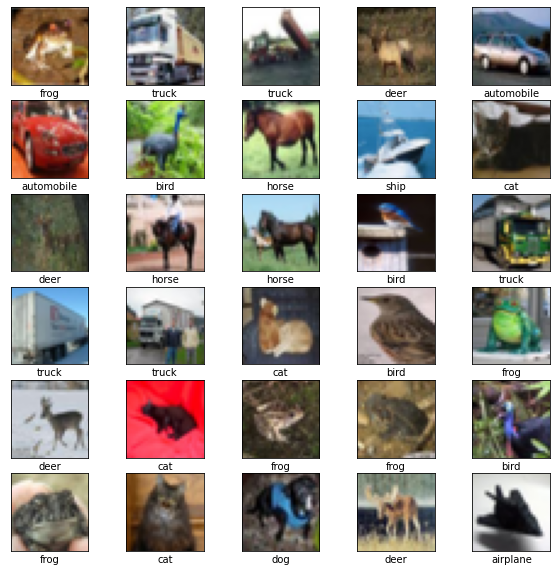

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Create the figure
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    # The CIFAR labels happen to be arrays,
    # Which is why you need an estra index
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

### Pass images to grayscale

In [6]:
train_images_gs = tf.image.rgb_to_grayscale(train_images)

test_images_gs = tf.image.rgb_to_grayscale(test_images)

In [7]:
print('Train images after removing rgb:', train_images_gs.shape)
print('Test images after removing rgb:', test_images_gs.shape)

Train images after removing rgb: (50000, 32, 32, 1)
Test images after removing rgb: (10000, 32, 32, 1)


### Train the model

In [8]:
# Assign the model to a variable
model_1 = models.Sequential()

# Add layers
# A convolutional layer with 8 neurons
model_1.add(layers.Conv2D(filters=8,
                        kernel_size=(3,3),
                        input_shape=(32, 32, 1),
                        padding='same'))

# A Maxpool layer
model_1.add(layers.MaxPooling2D((2, 2)))

# A dropout layer at 0.25
model_1.add(layers.Dropout(0.25))

# A flatten layer to transform it to a vector
model_1.add(layers.Flatten())

# A dense layer with 32 neurons
model_1.add(layers.Dense(32, activation='relu'))

# An output layer with 10 neurons and softmax as activation function
model_1.add(layers.Dense(10, activation='softmax'))

Summarize the model:

In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
____________________________________________________

In [10]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model_1.fit(train_images_gs, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 2.0459 - accuracy: 0.2549
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6039 - accuracy: 0.4315
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4844 - accuracy: 0.4811
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4173 - accuracy: 0.5039
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3771 - accuracy: 0.5190
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3429 - accuracy: 0.5351
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3076 - accuracy: 0.5397
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2921 - accuracy: 0.5482
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2742 - accuracy: 0.5566
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.249

In [12]:
test_loss, test_acc = model_1.evaluate(test_images_gs,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc, "\nLoss:", test_loss)

313/313 - 1s - loss: 1.3428 - accuracy: 0.5271

Test accuracy: 0.5271000266075134 
Loss: 1.3427962064743042


### Visualize greyscaled data

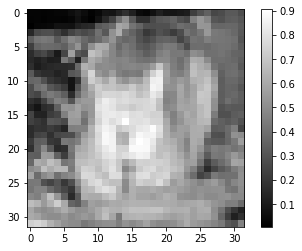

In [13]:
plt.figure()
plt.imshow(train_images_gs[33], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

### In this case, accuracy and loss aren't very rewarding. Maybe, we should try again with original images

### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

In [14]:
# Assign the model to a variable
model_2 = models.Sequential()

# Add layers
# A convolutional layer with 8 neurons
model_2.add(layers.Conv2D(filters=8,
                        kernel_size=(3,3),
                        input_shape=(32, 32, 3),
                        padding='same'))

# A Maxpool layer
model_2.add(layers.MaxPooling2D((2, 2)))

# A dropout layer at 0.25
model_2.add(layers.Dropout(0.25))

# A flatten layer to transform it to a vector
model_2.add(layers.Flatten())

# A dense layer with 32 neurons
model_2.add(layers.Dense(32, activation='relu'))

# An output layer with 10 neurons and softmax as activation function
model_2.add(layers.Dense(10, activation='softmax'))

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 66,122
Trainable params: 66,122
Non-trainable params: 0
__________________________________________________

In [16]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9792 - accuracy: 0.2624
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4301 - accuracy: 0.4973
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3163 - accuracy: 0.5350
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2450 - accuracy: 0.5646
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1792 - accuracy: 0.5844
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1398 - accuracy: 0.6001
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1011 - accuracy: 0.6131
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0793 - accuracy: 0.6206
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0551 - accuracy: 0.6297
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.032

In [18]:
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc, "\nLoss:", test_loss)

313/313 - 1s - loss: 1.1407 - accuracy: 0.6053

Test accuracy: 0.6053000092506409 
Loss: 1.1407079696655273


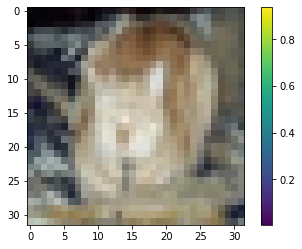

In [19]:
plt.figure()
plt.imshow(train_images[33])
plt.colorbar()
plt.grid(False)
plt.show()